# Customer Reviews on Amazon Products

The aim of this project is to analyze the E-Commerce company, Amazon’s most successful consumer electronics product launches; discover insights into consumer reviews and provide Data Visualization for the same. This shall focus on answering questions like: – 
First, which products on Amazon has got the greatest number of reviews and ratings. 
Second, what are the number of customer reviews for a product in any time frame. 
Third, how does any customer review of a product influence the sales of that product. 

Methods used are: Naïve Bayes and Logistic Regression. 
Results obtained from this project: We concluded that Review Text has more relevance when compared to Review Ratings because Review Ratings are more generic and does not provide an insight. This makes it difficult for the customer to take an informed decision about which product to buy. Furthermore, Review texts with detailed description is more insightful to a customer as a feedback than one-word comments or phrases. After rigorous data analysis and visualization, as a team, we came to a consensus that Amazon’s electronic products are of great ease and satisfaction to customers. This can be observed by viewing our Tableau screenshot, which depicts that customers have given a rating of 4 or 5 for products than 1 or 2. Hence, making it evident that Amazon products are popular and of great value to customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [26]:
cd C:\Users\Aishwarya Dev\Desktop\1st Sem\DAV\Project

C:\Users\Aishwarya Dev\Desktop\1st Sem\DAV\Project


In [27]:
pwd

'C:\\Users\\Aishwarya Dev\\Desktop\\1st Sem\\DAV\\Project'

In [30]:
tempdata=pd.read_csv("Data.csv")
tempdata.head(20)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [29]:
#Checking for null values
permanentdata = tempdata[['reviews.rating' , 'reviews.text']]
print(permanentdata.isnull().sum()) 

reviews.rating    33
reviews.text       1
dtype: int64


In [31]:
#Filter null values
check =  permanentdata[permanentdata["reviews.rating"].isnull()]
check.head() 

,reviews.rating,reviews.text
2886,NaN,The Kindle is my first e-ink reader. I own an ...
2887,NaN,"I'm a first-time Kindle owner, so I have nothi..."
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...
2889,NaN,"I'm a first-time Kindle owner, so I have nothi..."
2890,NaN,I woke up to a nice surprise this morning: a n...


In [12]:
permanentdata.dropna(inplace=True)
permanentdata['reviews.text'].fillna(0, inplace=True)
permanentdata['reviews.rating'].fillna(0, inplace=True)

C:\mili\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\mili\Softwares\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
permanentdata.head(20)

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...
5,5.0,This amazon fire 8 inch tablet is the perfect ...
6,4.0,"Great for e-reading on the go, nice and light ..."
7,5.0,"I gave this as a Christmas gift to my inlaws, ..."
8,5.0,Great as a device to read books. I like that i...
9,5.0,I love ordering books and reading them with th...


## Sentimental Analysis Methodology

In [14]:
senti= permanentdata[permanentdata["reviews.rating"].notnull()]
permanentdata.head() ##Filtering not null values

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [15]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

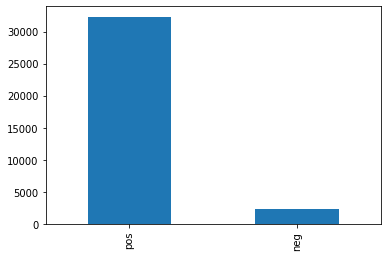

In [16]:
senti["senti"].value_counts().plot.bar()

In [17]:
cleanup_Text = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = cleanup_Text.sub(' ', sentence)
    sentence = sentence.strip()
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)

In [18]:
# Splitting Train and Test Data using 80,20 rule
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

## Naïve Bayes Classifier Methodology:

In [19]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])

def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features 
train_naive = []
test_naive = []
for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]


classifier = NaiveBayesClassifier.train(train_naive)
print("Accuracy  of Natural Language Tool Kit Naive bayes classifier : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))

Accuracy  of Natural Language Tool Kit Naive bayes classifier : 0.5783393501805054


In [20]:
classifier.show_most_informative_features(15)

Most Informative Features
                  poorly = True              neg : pos    =     69.6 : 1.0
                 deleted = True              neg : pos    =     51.1 : 1.0
              lackluster = True              neg : pos    =     41.8 : 1.0
             refurbished = True              neg : pos    =     41.8 : 1.0
                slippery = True              neg : pos    =     41.8 : 1.0
               returning = True              neg : pos    =     36.5 : 1.0
                  refund = True              neg : pos    =     34.2 : 1.0
                tomorrow = True              neg : pos    =     32.5 : 1.0
                 strange = True              neg : pos    =     32.5 : 1.0
              repeatedly = True              neg : pos    =     32.5 : 1.0
                 closure = True              neg : pos    =     32.5 : 1.0
              misleading = True              neg : pos    =     32.5 : 1.0
                    clue = True              neg : pos    =     32.5 : 1.0

In [21]:
import sys
print(sys.executable)

C:\mili\Softwares\Anaconda\python.exe


In [22]:
!pip install wordcloud

In [24]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_trans = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train = tfidf_trans.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test= tfidf_trans.transform(X_new_counts)

C:\mili\Softwares\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## Logistic Regression:

In [25]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logistic = logreg.fit(X_train, train["senti"])
print("Accuracy of Logistic Regression : {}".format(logreg.score(X_test , test["senti"])))
logreg.predict_proba(X_test)

C:\mili\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic Regression : 0.9390613718411552


array([[0.01796522, 0.98203478],
       [0.04188589, 0.95811411],
       [0.02384616, 0.97615384],
       ...,
       [0.07453282, 0.92546718],
       [0.34030131, 0.65969869],
       [0.46914111, 0.53085889]])

## Results:

Accuracy of Natural Language Tool Kit Naïve Bayes classifier: 57.83%
Accuracy of Logistic Regression: 93.9%

Closing Statement: We have used Naïve Bayes classifier and Logistic Regression on our dataset and observed that the Logistic Regression provides far greater accuracy and efficiency in terms of handling data than Naïve Bayes classifier. This can be attributed to the mechanism with which these two algorithms work. Naïve Bayes classifier is a basic classification algorithm which is applied to test the efficacy and classification of the dataset. Hence, it does not provide a clear distinction whether the given data can be suggested for recommendation to customers. On the contrary, the Logistic Regression model gives a definitive suggestion of whether the data is positive or negative in terms of the helpfulness for a customer. Thereby, making Logistic regression model more obvious choice for dealing with our data for retrieving insights and providing information to customers.
